In [59]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import plotly.express as px


file = "master.csv"

df = pd.read_csv(file, delimiter=",") #abrindo o arquivo
df #printar arquivo.



,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [20]:
df.mean()

year                  2.001258e+03
suicides_no           2.425744e+02
population            1.844794e+06
suicides/100k pop     1.281610e+01
HDI for year          7.766011e-01
gdp_per_capita ($)    1.686646e+04
dtype: float64

In [22]:
x = df['age'].value_counts()
x/len(df)

55-74 years    0.166858
75+ years      0.166858
35-54 years    0.166858
15-24 years    0.166858
25-34 years    0.166858
5-14 years     0.165708
Name: age, dtype: float64

In [24]:
y = df['sex'].value_counts()
y/len(df)

female    0.5
male      0.5
Name: sex, dtype: float64

In [26]:
z = df['generation'].value_counts()
z/len(df)

Generation X       0.230338
Silent             0.228756
Millenials         0.210065
Boomers            0.179367
G.I. Generation    0.098634
Generation Z       0.052840
Name: generation, dtype: float64

In [27]:
w = df['country-year'].value_counts()
w/len(df)

Netherlands2011    0.000431
Australia2000      0.000431
Kyrgyzstan2013     0.000431
Romania1992        0.000431
Sri Lanka1985      0.000431
                     ...   
Iceland2016        0.000359
Netherlands2016    0.000359
Austria2016        0.000359
Thailand2016       0.000359
Armenia2016        0.000359
Name: country-year, Length: 2321, dtype: float64

Text(0, 0.5, 'Suicides')

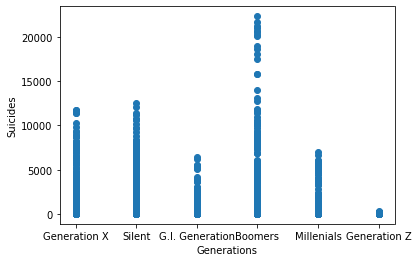

In [34]:
import matplotlib.pyplot as plt

plt.scatter(df.generation,df.suicides_no)
plt.xlabel("Generations")
plt.ylabel("Suicides")

Text(0, 0.5, 'Suicides')

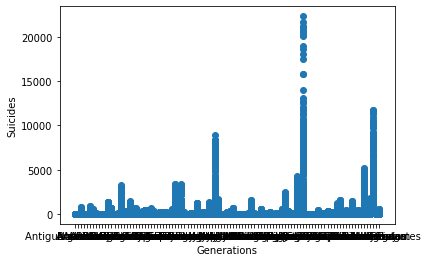

In [37]:
plt.scatter(df.country,df.suicides_no)
plt.xlabel("Generations")
plt.ylabel("Suicides")

In [39]:
df['suicides_no'].mode()

0    0
dtype: int64

In [40]:
df['suicides_no'].median()

25.0

In [42]:
df['suicides_no'].mean()

242.57440690150972

Text(0, 0.5, 'Data')

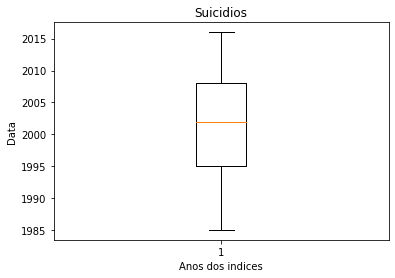

In [48]:
plt.boxplot(df['year'])

plt.title('Suicidios')
plt.xlabel('Anos dos indices')
plt.ylabel('Data')

In [52]:
df['year'].var()

71.72489300702198

In [51]:
df['year'].std()

8.469055024441746

In [53]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1,-0.00454596,0.00885017,-0.0390368,0.366786,0.339134
suicides_no,-0.00454596,1,0.616162,0.306604,0.151399,0.0613297
population,0.00885017,0.616162,1,0.00828497,0.102943,0.0815099
suicides/100k pop,-0.0390368,0.306604,0.00828497,1,0.0742791,0.00178513
HDI for year,0.366786,0.151399,0.102943,0.0742791,1,0.771228
gdp_per_capita ($),0.339134,0.0613297,0.0815099,0.00178513,0.771228,1


In [63]:
dg = pd.DataFrame(dict(r= [1,5,2,2,3],theta = ['a','b','c','d','e']))
fig= px.line_polar(dg, r = 'r',theta = 'theta', line_close = True)
fig.update_traces(fill= 'toself')
fig.show()

In [62]:
df.drop(columns = ['HDI for year'])

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,"63,067,077,179",2309,Generation Z


In [65]:
df.loc[df['sex'] == "female"].sample(n=4, random_state =2) #gerando uma amostra aleatória com 4 elementos

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
22661,Singapore,2006,female,15-24 years,3,231800,1.29,Singapore2006,NaN,"147,797,218,201",43318,Millenials
17470,New Zealand,1986,female,5-14 years,2,265700,0.75,New Zealand1986,NaN,"30,604,668,357",10114,Generation X
42,Albania,1992,female,35-54 years,2,323100,0.62,Albania1992,NaN,"709,452,584",251,Boomers
9438,France,2014,female,75+ years,424,3677450,11.53,France2014,0.888,"2,852,165,760,630",47318,Silent


In [66]:
print('Valores faltantes:', df.isnull().sum()) #quantidade de valores faltantes para todos os atributos

Valores faltantes: country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


In [67]:
print('Valores duplicados:', df.duplicated()) #quantidade de valores duplicados para todos os atributos

Valores duplicados: 0        False
1        False
2        False
3        False
4        False
         ...  
27815    False
27816    False
27817    False
27818    False
27819    False
Length: 27820, dtype: bool


In [68]:
median = df['HDI for year'].median()
df['HDI for year'].fillna(median, inplace = True) #subtitui os elementos faltosos pela mediana
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.779,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.779,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.779,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.779,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.779,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [69]:
df = df.dropna(how ='any') #elimina todas as linhas com dados ausentes
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.779,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.779,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.779,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.779,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.779,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [70]:
df.drop_duplicates() #elimina todas as linhas com dados duplicados

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.779,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.779,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.779,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.779,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.779,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [71]:
le = preprocessing.LabelEncoder() #transforma atributos qualitativos em quantitativos
for column in df.columns:
    if df[column].dtypes == 'object':
        df[column] = le.fit_transform(df[column])
        
print(df)

       country  year  sex  age  suicides_no  population  suicides/100k pop  \
0            0  1987    1    0           21      312900               6.71   
1            0  1987    1    2           16      308000               5.19   
2            0  1987    0    0           14      289700               4.83   
3            0  1987    1    5            1       21800               4.59   
4            0  1987    1    1            9      274300               3.28   
...        ...   ...  ...  ...          ...         ...                ...   
27815      100  2014    0    2          107     3620833               2.96   
27816      100  2014    0    5            9      348465               2.58   
27817      100  2014    1    3           60     2762158               2.17   
27818      100  2014    0    3           44     2631600               1.67   
27819      100  2014    0    4           21     1438935               1.46   

       country-year  HDI for year   gdp_for_year ($)   gdp_per_

In [72]:
rs = RobustScaler() #normalização dos dados e para isso remove a mediana e dimensiona os dados de acordo com o intervalo quantil
X = rs.fit_transform(df)

print(X)

[[-0.94       -1.15384615  0.5        ... -0.37381568 -0.40024268
   0.        ]
 [-0.94       -1.15384615  0.5        ... -0.37381568 -0.40024268
   1.        ]
 [-0.94       -1.15384615 -0.5        ... -0.37381568 -0.40024268
   0.        ]
 ...
 [ 1.06        0.92307692  0.5        ...  0.66838932 -0.32963084
   0.33333333]
 [ 1.06        0.92307692 -0.5        ...  0.66838932 -0.32963084
   0.33333333]
 [ 1.06        0.92307692 -0.5        ...  0.66838932 -0.32963084
  -0.66666667]]


In [73]:
x_array = np.array(df['suicides_no']) 
normalized_X = preprocessing.normalize([x_array]) #normaliza os dados do atributo entre 0 e 1

normalized_X

array([[1.34789832e-04, 1.02697015e-04, 8.98598883e-05, ...,
        3.85113807e-04, 2.82416792e-04, 1.34789832e-04]])

In [74]:
x = np.array([2.5,0.5,2.2,1.9,3.1,2.3,2.0,1.0,1.5,1.1])
y = np.array([2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9])

Z = np.c_[x-x.mean(), y - y.mean()] #concatena os vetores agora centralizados
df = pd.DataFrame(Z, columns=['x','y'])
df.index.name = 'Medidas'
df.T #transposta da matriz

Medidas,0,1,2,3,4,5,6,7,8,9
x,0.69,-1.31,0.39,0.09,1.29,0.49,0.19,-0.81,-0.31,-0.71
y,0.49,-1.21,0.99,0.29,1.09,0.79,-0.31,-0.81,-0.31,-1.01


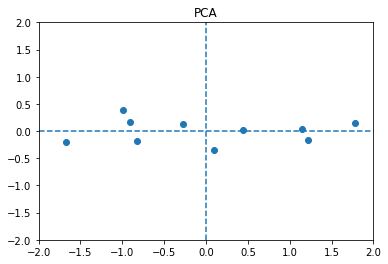

In [75]:
pca = PCA(n_components = 2, copy = True) #executando o PCA
X = pca.fit_transform(Z)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.axhline(linestyle='dashed') #linha no eixo x
ax.axvline(linestyle='dashed') #linha no eixo y
_ = ax.set_title("PCA")